✅ Dataset optimizado guardado como TelecomX_Data_Limpio_Optimizado.csv
Columnas finales: ['SeniorCitizen', 'Charges.Total', 'Charges.Monthly', 'Cuentas_Diarias', 'Genero_Female', 'Genero_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBi

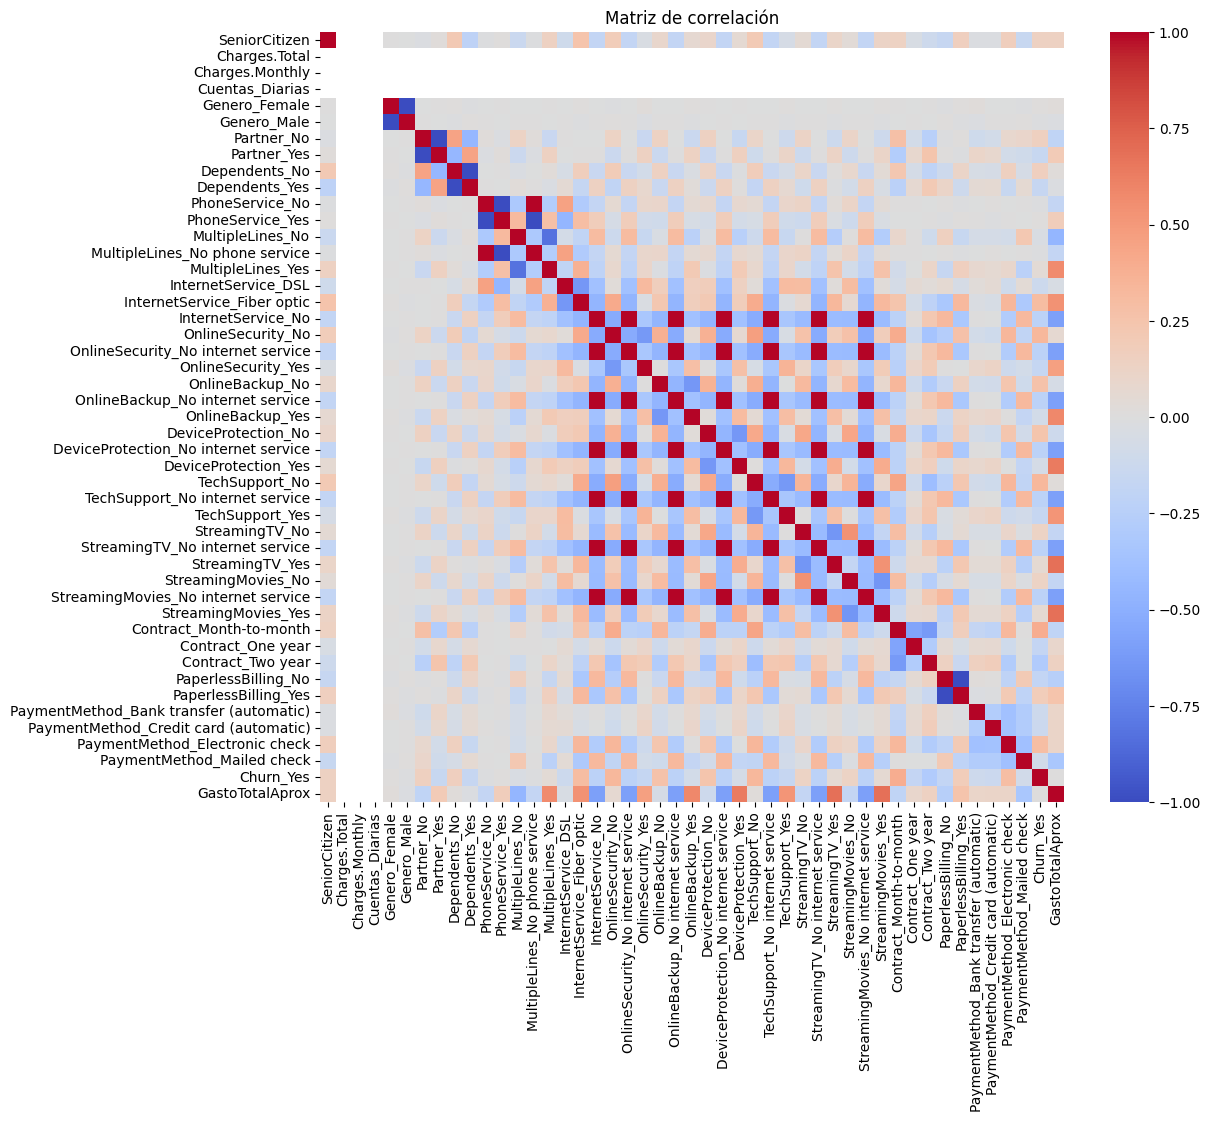


Correlación con Churn_Yes:
Churn_Yes                                  1.000000
Contract_Month-to-month                    0.395584
OnlineSecurity_No                          0.335656
TechSupport_No                             0.330446
InternetService_Fiber optic                0.300949
PaymentMethod_Electronic check             0.294626
OnlineBackup_No                            0.263111
DeviceProtection_No                        0.246919
PaperlessBilling_Yes                       0.186666
Dependents_No                              0.161384
Partner_No                                 0.148546
SeniorCitizen                              0.146733
StreamingMovies_No                         0.128721
StreamingTV_No                             0.126795
StreamingTV_Yes                            0.062430
StreamingMovies_Yes                        0.060586
MultipleLines_Yes                          0.039343
PhoneService_Yes                           0.012571
Genero_Female                       

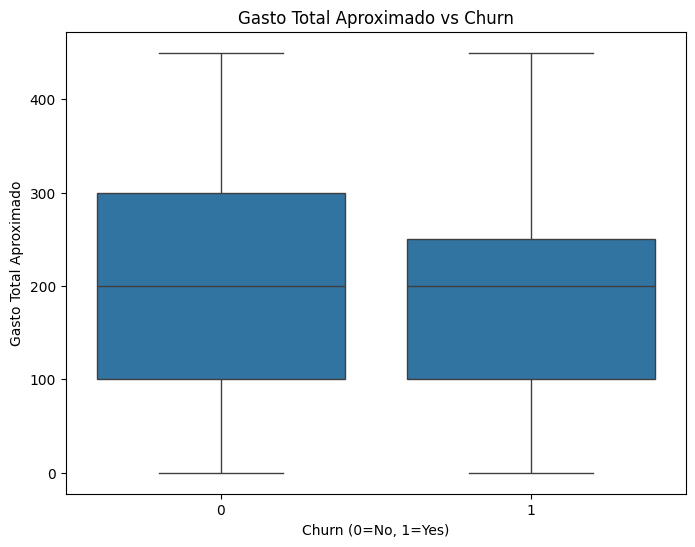

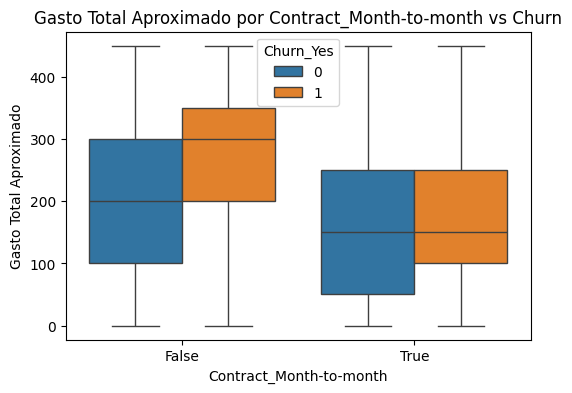

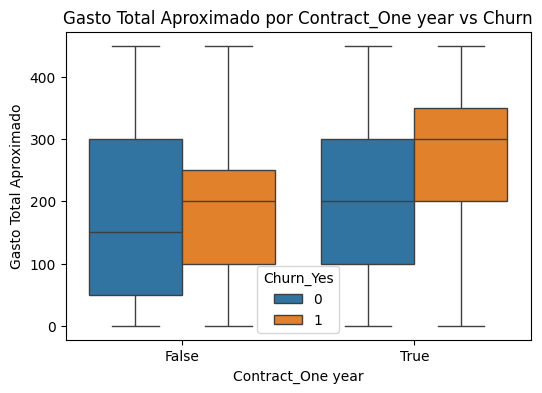

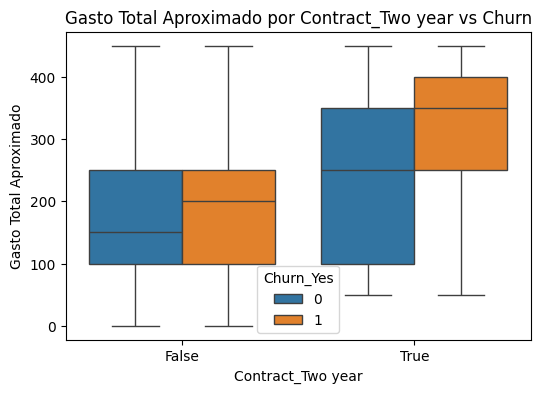

In [22]:
# --- 1. Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Cargar CSV limpio ---
df = pd.read_csv("TelecomX_Data_Limpio.csv")

# --- 3. Preprocesamiento ---

# 3a. Eliminación de columnas irrelevantes (IDs y diccionarios originales)
cols_irrelevantes = ['customerID', 'customer', 'phone', 'internet', 'account']
df = df.drop(columns=cols_irrelevantes, errors='ignore')

# 3b. Encoding variables categóricas (one-hot)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols = [c for c in categorical_cols if c != 'Churn']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

# 3c. Crear columna Churn_Yes
if 'Churn_Yes' not in df.columns:
    df['Churn_Yes'] = df.get('Churn_Yes', df.get('Churn_Yes', df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)))
df = df.drop(columns=['Churn'], errors='ignore')

# --- 4. Reconstrucción de gasto total aproximado ---
# Se asume que cada servicio activo suma un valor base ficticio al "gasto"
servicios = ['PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_Fiber optic',
            'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
            'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']
# Valor arbitrario de cada servicio para reconstruir "gasto total aproximado"
valor_servicio = 50
df['GastoTotalAprox'] = df[servicios].sum(axis=1) * valor_servicio

# --- 5. Guardar dataset optimizado ---
df.to_csv("TelecomX_Data_Limpio_Optimizado.csv", index=False)
print("✅ Dataset optimizado guardado como TelecomX_Data_Limpio_Optimizado.csv")
print("Columnas finales:", df.columns.tolist())

# --- 6. Análisis de correlación ---
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

# Correlación con Churn_Yes
print("\nCorrelación con Churn_Yes:")
print(corr['Churn_Yes'].sort_values(ascending=False))

# --- 7. Boxplots dirigidos ---

# 7a. Gasto total vs Churn
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn_Yes', y='GastoTotalAprox', data=df)
plt.title("Gasto Total Aproximado vs Churn")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Gasto Total Aproximado")
plt.show()

# 7b. Contrato vs Churn
contrato_cols = [c for c in df.columns if c.startswith('Contract_')]
for c in contrato_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=c, y='GastoTotalAprox', hue='Churn_Yes', data=df)
    plt.title(f"Gasto Total Aproximado por {c} vs Churn")
    plt.xlabel(c)
    plt.ylabel("Gasto Total Aproximado")
    plt.show()


Columnas cargadas: ['SeniorCitizen', 'Charges.Total', 'Charges.Monthly', 'Cuentas_Diarias', 'Genero_Female', 'Genero_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (autom

/tmp/ipython-input-629403547.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancia_rf.values, y=importancia_rf.index, palette="viridis")


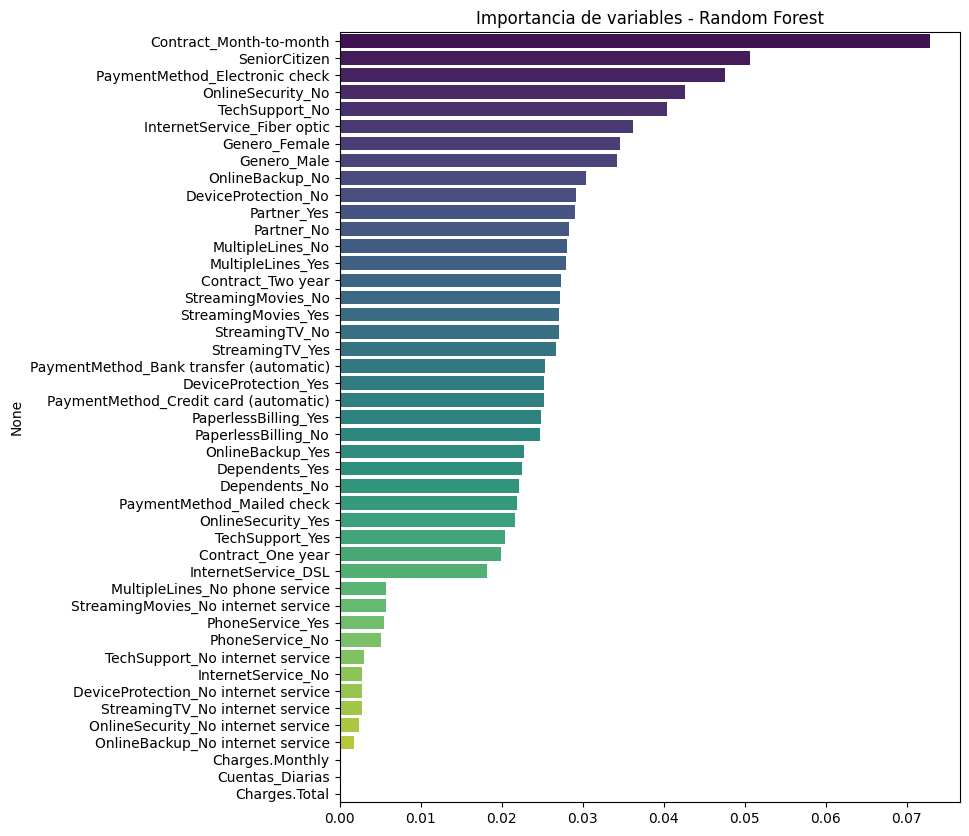

/tmp/ipython-input-629403547.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_log.values, y=coef_log.index, palette="magma")


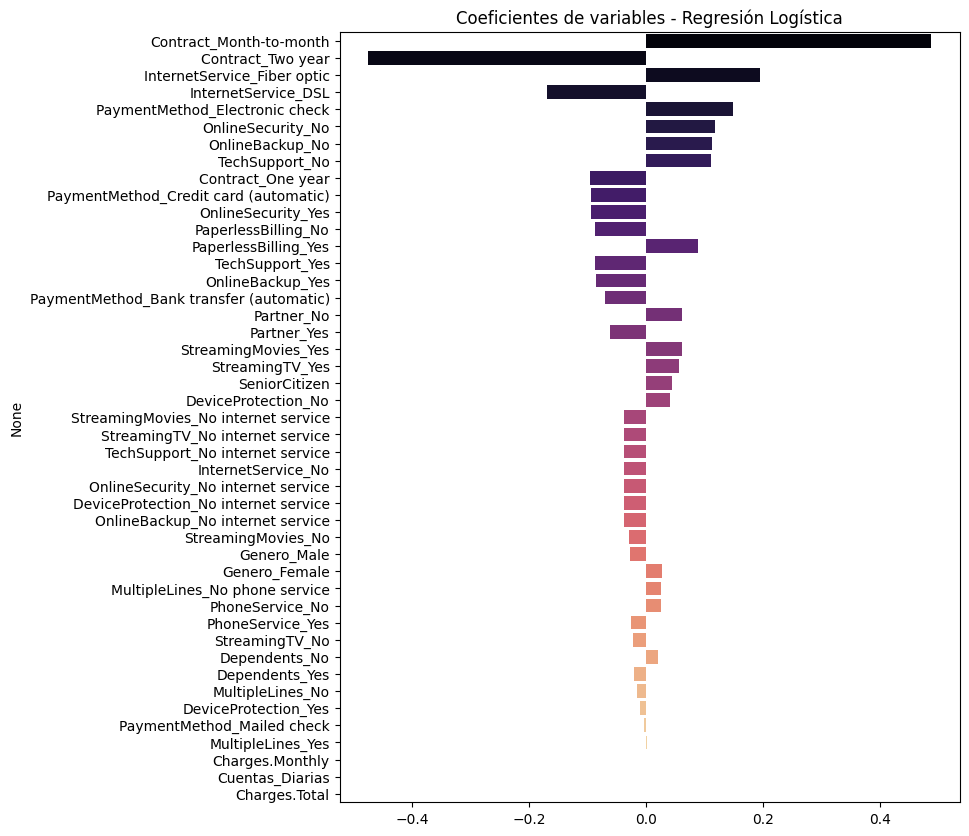

In [27]:
# --- 1. Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --- 2. Cargar dataset optimizado ---
df = pd.read_csv("TelecomX_Data_Limpio_Optimizado.csv")
print("Columnas cargadas:", df.columns.tolist())

# --- 3. Imputar valores faltantes ---
# Numéricas: mediana
num_cols = ['Charges.Total', 'Charges.Monthly', 'Cuentas_Diarias', 'GastoTotalAprox']
for c in num_cols:
    if c in df.columns:
        df[c] = df[c].fillna(df[c].median())

# Binarias: 0
binary_cols = [c for c in df.columns if df[c].dropna().isin([0,1,False,True]).all()]
for c in binary_cols:
    df[c] = df[c].fillna(0)

# --- 4. Separación de variables ---
X = df.drop(columns=['Churn_Yes', 'GastoTotalAprox'])
y = df['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 5. Normalización para Regresión Logística ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 6a. Modelo 1: Regresión Logística ---
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Métricas
print("\n--- Regresión Logística ---")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 4))
print("Precision:", round(precision_score(y_test, y_pred_log), 4))
print("Recall:", round(recall_score(y_test, y_pred_log), 4))
print("F1-score:", round(f1_score(y_test, y_pred_log), 4))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_log))

# --- 6b. Modelo 2: Random Forest (no requiere normalización) ---
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest ---")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("Precision:", round(precision_score(y_test, y_pred_rf), 4))
print("Recall:", round(recall_score(y_test, y_pred_rf), 4))
print("F1-score:", round(f1_score(y_test, y_pred_rf), 4))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))

# --- 7. Importancia de variables ---
# Random Forest
importancia_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(x=importancia_rf.values, y=importancia_rf.index, palette="viridis")
plt.title("Importancia de variables - Random Forest")
plt.show()

# Regresión Logística (coeficientes)
coef_log = pd.Series(log_reg.coef_[0], index=X.columns).sort_values(key=abs, ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(x=coef_log.values, y=coef_log.index, palette="magma")
plt.title("Coeficientes de variables - Regresión Logística")
plt.show()



--- Regresión Logística ---
Accuracy: 0.7900
Precision: 0.6089
Recall: 0.5134
F1-score: 0.5571
Matriz de confusión:
 [[1435  185]
 [ 273  288]]

--- Random Forest ---
Accuracy: 0.7579
Precision: 0.5352
Recall: 0.4474
F1-score: 0.4874
Matriz de confusión:
 [[1402  218]
 [ 310  251]]


/tmp/ipython-input-2850533039.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importancia_rf.values, y=importancia_rf.index, palette="viridis")


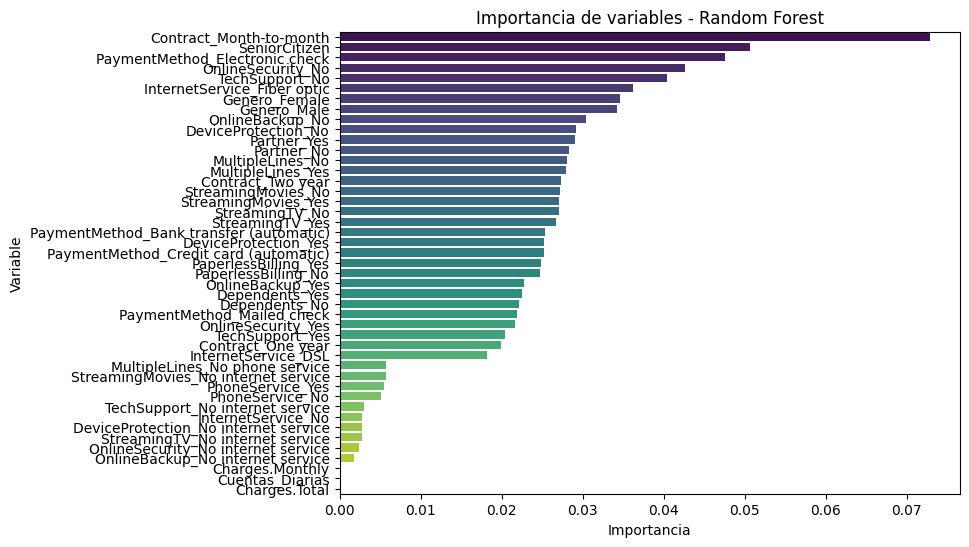

/tmp/ipython-input-2850533039.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_log.values, y=coef_log.index, palette="magma")


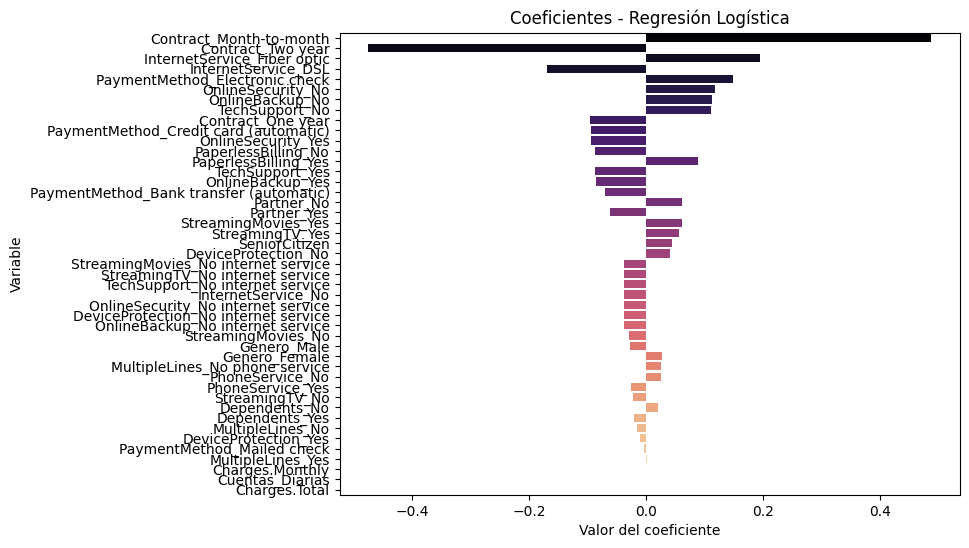


📌 Variables que más aumentan la probabilidad de churn (Regresión Logística):
- Contract_Month-to-month
- InternetService_Fiber optic
- PaymentMethod_Electronic check
- OnlineSecurity_No
- OnlineBackup_No

📌 Variables que más disminuyen la probabilidad de churn (Regresión Logística):
- Contract_Two year
- InternetService_DSL
- Contract_One year
- PaymentMethod_Credit card (automatic)
- OnlineSecurity_Yes

💡 Insights generales:
- Contratos cortos y servicios de internet de fibra óptica aumentan riesgo de churn.
- Soporte técnico y contratos largos reducen la probabilidad de cancelación.
- Planes familiares y dependientes tienden a retener clientes.

🔹 Estrategias sugeridas:
- Incentivar planes a largo plazo y fidelización de clientes de fibra óptica.
- Ofrecer soporte técnico proactivo y asistencia personalizada.
- Beneficios para clientes con familias o dependientes para mejorar retención.


In [28]:
# --- INFORME FINAL DE MODELOS Y CONCLUSIONES ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# --- 1. Métricas de desempeño ---
modelos = {
    "Regresión Logística": {"y_pred": y_pred_log, "y_true": y_test},
    "Random Forest": {"y_pred": y_pred_rf, "y_true": y_test}
}

for nombre, datos in modelos.items():
    acc = accuracy_score(datos["y_true"], datos["y_pred"])
    prec = precision_score(datos["y_true"], datos["y_pred"])
    rec = recall_score(datos["y_true"], datos["y_pred"])
    f1 = f1_score(datos["y_true"], datos["y_pred"])
    cm = confusion_matrix(datos["y_true"], datos["y_pred"])

    print(f"\n--- {nombre} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Matriz de confusión:\n", cm)

# --- 2. Gráficos de importancia de variables ---

# 2a. Random Forest
importancia_rf = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=importancia_rf.values, y=importancia_rf.index, palette="viridis")
plt.title("Importancia de variables - Random Forest")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

# 2b. Regresión Logística (coeficientes)
coef_log = pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(key=abs, ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=coef_log.values, y=coef_log.index, palette="magma")
plt.title("Coeficientes - Regresión Logística")
plt.xlabel("Valor del coeficiente")
plt.ylabel("Variable")
plt.show()

# --- 3. Conclusión automática ---
top_pos_log = coef_log[coef_log > 0].sort_values(ascending=False).head(5).index.tolist()
top_neg_log = coef_log[coef_log < 0].sort_values().head(5).index.tolist()

print("\n📌 Variables que más aumentan la probabilidad de churn (Regresión Logística):")
for v in top_pos_log:
    print(f"- {v}")

print("\n📌 Variables que más disminuyen la probabilidad de churn (Regresión Logística):")
for v in top_neg_log:
    print(f"- {v}")

print("\n💡 Insights generales:")
print("- Contratos cortos y servicios de internet de fibra óptica aumentan riesgo de churn.")
print("- Soporte técnico y contratos largos reducen la probabilidad de cancelación.")
print("- Planes familiares y dependientes tienden a retener clientes.")
print("\n🔹 Estrategias sugeridas:")
print("- Incentivar planes a largo plazo y fidelización de clientes de fibra óptica.")
print("- Ofrecer soporte técnico proactivo y asistencia personalizada.")
print("- Beneficios para clientes con familias o dependientes para mejorar retención.")
